# CORRELATION

In [4]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns 
import statistics as st
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math 

## GROUP DISCUSSION

* Apa itu korelasi?
* Apa syarat penggunaan tipe korelasi berikut:
    * Pearson (grup 1)
    * Spearman (grup 2)
    * Kendall (grup 3)
* Bagaimana cara melakukan korelasi menggunakan Pandas?


## Correlation 

(to be exact Correlation in Statistic) is a measure of a mutual relationship between two variables whether they are causal or not. 

This degree of measurement could be measured on any kind of data type (Continous and Continous, Categorical and Categorical, Continous and Categorical). 

Although correlation stated how it measured the mutual relationship, the presence of correlation measurement does not provide strong evidence toward causation. 

## Kendall Tau Rank Correlation

Another way to measure the non-linear relationship between variables is by applying Kendall’s Tau Rank Correlation. 

Kendall Tau rank correlation coefficient measures the degree of similarity between two sets of ranks given to the same set of objects. However, unlike Spearman’s coefficient, Kendall Tau only measures directional agreement, not the rank differences.

 Therefore, this coefficient is more appropriate for discrete data. Below is how we measure the Kendall Tau Correlation.

In [10]:
Image(url= 'https://miro.medium.com/max/700/1*emJMzjQ1aAuCpdcpzGH5KQ.png')

Kendall Tau will take values between −1 and +1 with a value closer to −1 means when one rank order is the exact reverse of the other rank order and the closer the value to +1 means both rank orders are identical. 

Kendall Tau correlation could be also interpreted as a probability difference between the probability of object in the same order (concordant) with observation in a different order (discordant).

Kendall Tau is good to be used in the case we want to know if the order of the variables is similar or not; especially if our data is discrete. However, there are other ways to measure discrete variable correlation (Shaked Zychlinski have written a really good article about it here but I want to elaborate it even more)

In [11]:
Image(url= 'https://www.statisticshowto.com/wp-content/uploads/2016/04/kendalls-tau.png')

Three possible scenarios are possible for these ordered pairs:

- Tied pairs: both interviewers agree. For example, candidate A was marked as a 1st choice for both interviewers, so they are tied.

- Concordant pairs: both interviewers rank both applicants in the same order — that is, they both move in the same direction. While they aren’t the same rank (i.e. both 1st or both 2nd), each pair is ordered equally higher or equally lower. Interviewer 1 ranked F as 6th and G as 7th, while interviewer 2 ranked F as 5th and G as 8th. F and G are concordant because F was consistently ranked higher than G.

- Discordant pairs: Candidates E and F are discordant because the interviewers ranked in opposite directions (one said E had a higher rank than F, while the other said F ranked higher than 6).

In [5]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

# scipy.stats.pearsonr(x, y)    # Pearson's r

# scipy.stats.spearmanr(x, y)   # Spearman's rho

scipy.stats.kendalltau(x, y)  # Kendall's tau


KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [9]:
scipy.stats.kendalltau(nba['Age'], nba['Salary'])  # Kendall's tau


KendalltauResult(correlation=0.15020250343460145, pvalue=3.79919347508624e-05)

In [13]:
nba = pd.read_csv('nba.csv')
print(nba.shape)
nba.head()

(458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [15]:
# cek ada berapa NaN pada setiap kolom
nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [17]:
# karena College banyak NaN, maka kita hapus kolomnya
nba = nba.drop('College', axis=1)

In [18]:
# hapus baris yg mengandung NaN
nba.dropna(inplace=True)

In [19]:
# menampilkan baris,kolom bersih yg tersisa setelah menghapus data NaN
nba.shape

(446, 8)

# Pandas

In [20]:
nba.corr()
# outputnya adalah koefisien korelasi

,Number,Age,Weight,Salary
Number,1.000000,0.014776,0.198121,-0.112386
Age,0.014776,1.000000,0.076597,0.213459
Weight,0.198121,0.076597,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


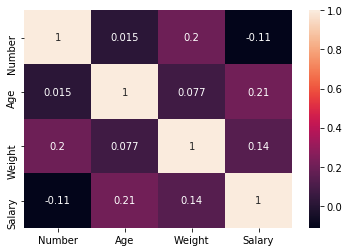

In [40]:
# menampilkan koefisien korelasi dalam bentuk heatmap
sns.heatmap(nba.corr(), annot=True)
plt.show()

Kalau nilai koefisiennya:

- +/- 0.8--1.0   : Korelasi sangat kuat
- +/- 0.6--0.8 : Korelasi moderate
- +/- 0.4--0.6 : Korelasi lemah
- +/- 0.0--0.4 : Tidak ada Korelasi

tapi balik lagi tergantung domain knowledge/ bidang industri

In [21]:
nba['Weight'].corr(nba['Salary'])
# defaulnya adalah metode PEARSON

0.13832119352196928

In [22]:
nba['Weight'].corr(nba['Salary'], method='spearman')
# dgn metode SPEARMAN

0.12762797185353447

In [23]:
nba[['Weight','Salary']].corr(method='spearman')
# dgn metode SPEARMAN juga

,Weight,Salary
Weight,1.000000,0.127628
Salary,0.127628,1.000000


In [24]:
nba['Weight'].corr(nba['Salary'], method='kendall')
# dgn metode KENDALL

0.08716546215152678

# NUMPY

In [26]:
np.corrcoef(nba['Weight'], nba['Salary'])
# numpy hanya punya pearson correlation

array([[1.        , 0.13832119],
       [0.13832119, 1.        ]])

# SCIPY

In [28]:
# PEARSON R
scipy.stats.pearsonr(nba['Weight'], nba['Salary'])

# output berupa (koefisien, pvalue)
# untuk korelasi, kita melihat ke koefisiennya

(0.13832119352196942, 0.0034219389302795294)

In [29]:
# SPEARMAN R
scipy.stats.spearmanr(nba['Weight'], nba['Salary'])

SpearmanrResult(correlation=0.12762797185353447, pvalue=0.00695859325539381)

In [30]:
# KENDALL TAU
scipy.stats.kendalltau(nba['Weight'], nba['Salary'])

KendalltauResult(correlation=0.08716546215152678, pvalue=0.006931877377111482)

# VISUALISASI DATA

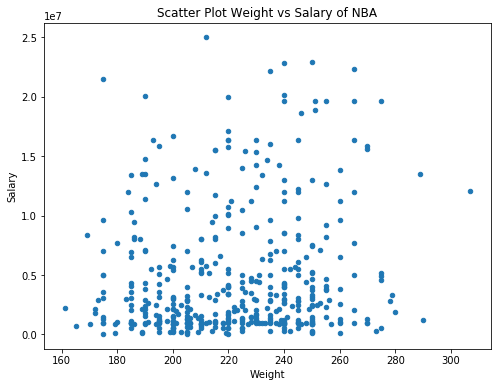

In [41]:
# dgn PANDAS
nba.plot.scatter('Weight','Salary', figsize=(8,6))

plt.xlabel('Weight')
plt.ylabel('Salary')
plt.title('Scatter Plot Weight vs Salary of NBA')
plt.show()

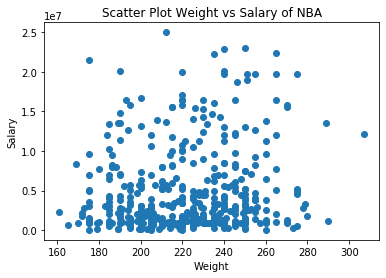

In [35]:
# dgn MATPLOTLIB
plt.scatter(nba['Weight'],nba['Salary'])

plt.xlabel('Weight')
plt.ylabel('Salary')
plt.title('Scatter Plot Weight vs Salary of NBA')
plt.show()

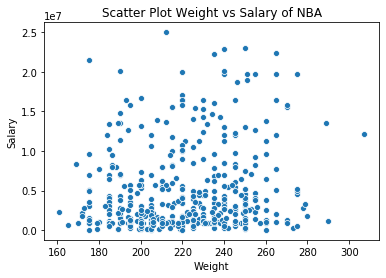

In [42]:
# dgn SEABORN
sns.scatterplot(x='Weight', y='Salary', data=nba)

plt.xlabel('Weight')
plt.ylabel('Salary')
plt.title('Scatter Plot Weight vs Salary of NBA')
plt.show()

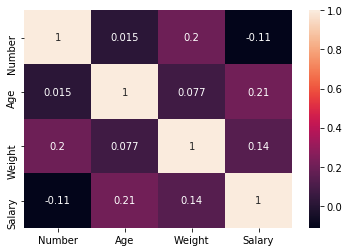

In [39]:
# heatmap
sns.heatmap(nba.corr(), annot=True)
plt.show()